## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Carga datos y representa la serie

In [7]:
data = pd.read_csv(r"C:\Users\suert\OneDrive\Documentos\GitHub\Machine_Learning\3-Time_Series\ejercicios\data\AirPassengers.csv")
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


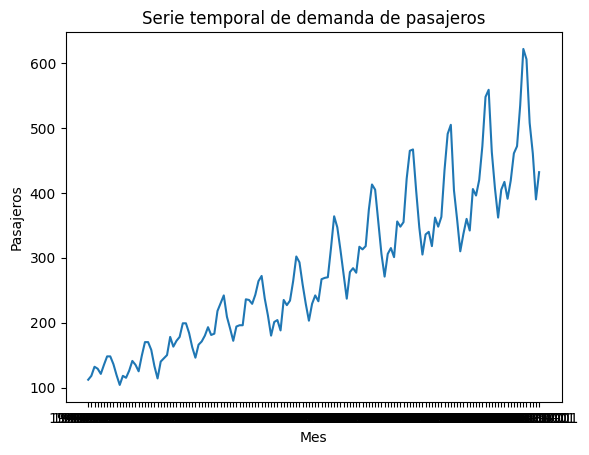

In [8]:
plt.plot(data['date'], data['value'])
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.title('Serie temporal de demanda de pasajeros')
plt.show()

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

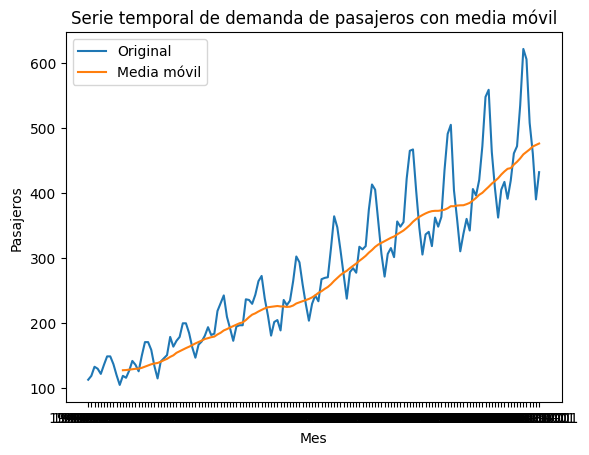

In [11]:
seasonality = 12  


rolling_mean = data['value'].rolling(window=seasonality).mean()


plt.plot(data['date'], data['value'], label='Original')
plt.plot(data['date'], rolling_mean, label='Media móvil')
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.title('Serie temporal de demanda de pasajeros con media móvil')
plt.legend()
plt.show()

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de Dickey-Fuller aumentada (ADF)
result = adfuller(data['value'])

# Extraer el valor p y compararlo con un umbral de significancia (por ejemplo, 0.05)
p_value = result[1]

if p_value <= 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria.")


La serie no es estacionaria.


## 4. Aplica una transformación logarítmica

In [14]:
data['value'] = np.log(data['value'])

## 5. Divide en train y test. Guarda 20 muestras para test.

In [15]:
from sklearn.model_selection import train_test_split

# Dividir en train y test
train_data, test_data = train_test_split(data, test_size=20, shuffle=False)

## 6. Crea tu primer modelo ARIMA

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Crear el modelo ARIMA
model = ARIMA(train_data['value'], order=(p, d, q))
model_fit = model.fit()

# Realizar predicciones en los datos de prueba
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (RMSE)
mae = mean_absolute_error(test_data['value'], predictions)
rmse = mean_squared_error(test_data['value'], predictions, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)



MAE: 0.2073371410862964
RMSE: 0.2516138073264317


No se encontró un modelo ARIMA válido.


## 7. Representa en una gráfica los datos de test y tus predicciones.

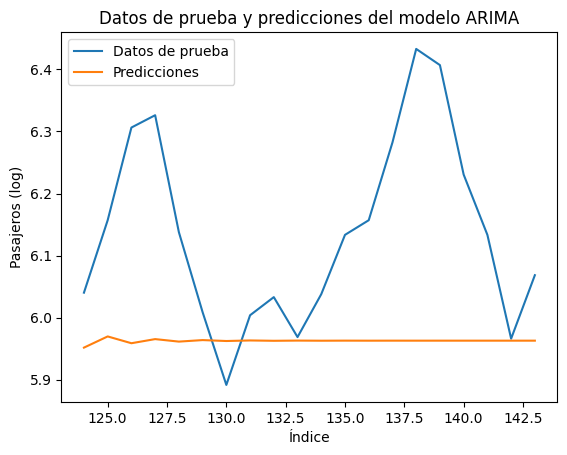

In [23]:
test_index = range(len(train_data), len(train_data) + len(test_data))

# Graficar los datos de prueba y las predicciones
plt.plot(test_index, test_data['value'], label='Datos de prueba')
plt.plot(test_index, predictions, label='Predicciones')
plt.xlabel('Índice')
plt.ylabel('Pasajeros (log)')
plt.title('Datos de prueba y predicciones del modelo ARIMA')
plt.legend()
plt.show()

## 8. Prueba otros modelos, a ver qué performance presentan.

Decision Tree

In [26]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [27]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor()


dt_model.fit(train_data[['date']], train_data['value'])


dt_predictions = dt_model.predict(test_data[['date']])


dt_mae = mean_absolute_error(test_data['value'], dt_predictions)
dt_rmse = mean_squared_error(test_data['value'], dt_predictions, squared=False)

print("Decision Tree MAE:", dt_mae)
print("Decision Tree RMSE:", dt_rmse)




Decision Tree MAE: 0.16647571849653886
Decision Tree RMSE: 0.21455744443500052


Radom forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo Random Forest
rf_model = RandomForestRegressor()

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(train_data[['date']], train_data['value'])

# Realizar predicciones en los datos de prueba
rf_predictions = rf_model.predict(test_data[['date']])

# Calcular el MAE y RMSE del modelo Random Forest
rf_mae = mean_absolute_error(test_data['value'], rf_predictions)
rf_rmse = mean_squared_error(test_data['value'], rf_predictions, squared=False)

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest MAE: 0.17801899129163923
Random Forest RMSE: 0.22631580330865791
